In [1]:
# import libraries
import numpy as np
import pandas as pd
import h5py
import json
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import ticker, cm, colors
from itertools import compress
import os
from datetime import datetime
from calfews_src import *
from calfews_src.util import *
# from calfews_src.visualizer import Visualizer

### FKC capacity constraints

In [2]:
# datDaily = get_results_sensitivity_number_outside_model('results/wy2017/results.hdf5', '')
# keys = list(datDaily.keys())


In [3]:
# [s for s in keys if s.split('_')[0]=='lowertule']

In [4]:
# flow = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
# nodes = [k.split('_')[1] for k in flow]
# turnout = [s for s in keys if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']

In [5]:
# plt.figure()
# for k in flow:
#     plt.plot(datDaily[k], label=k)
# plt.legend()

In [6]:
# flowfrac = np.zeros((datDaily.shape[0], len(flow)))
# flowtot = np.zeros((datDaily.shape[0], len(flow)))
# for i,k in enumerate(flow):
#     flowfrac[:, -(1+i)] = datDaily[k] / datDaily[k].max()
#     flowtot[:, -(i+1)] = datDaily[k]
# flowfrac = flowfrac.transpose()
# flowtot = flowtot.transpose()

# tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
# tonode = np.zeros((datDaily.shape[0], len(turnout)))    
# for i,k in enumerate(turnout):
#     tofrac[:, -(i+1)] = datDaily[k] / datDaily[k].max()
#     tonode[:, -(i+1)] = datDaily[k]
# tofrac = tofrac.transpose()
# tonode = tonode.transpose()

# totot = np.zeros((datDaily.shape[0]))    
# for i,k in enumerate(turnout):
#     totot[:] += datDaily[k]

In [7]:
# fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6, figsize=(14,18), sharex=True)
# ax1.plot((datDaily['fkc_COF_flow'] + datDaily['fkc_COF_turnout']).values)
# ax1.set_ylabel('Flow from MIL (tAF)')

# m = ax2.pcolormesh(flowtot)
# a = ax2.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax2)
# cb.set_label('Flow (tAF)')

# m = ax3.pcolormesh(flowfrac)
# a = ax3.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax3)
# cb.set_label('Flow capacity fraction')


# ax4.plot(totot)
# ax4.set_ylabel('Total FKC turnout (tAF)')

# m = ax5.pcolormesh(tonode)
# a = ax5.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax5)
# cb.set_label('Turnout at node (tAF)')

# m = ax6.pcolormesh(tofrac)
# a = ax6.set_xlabel('Date')
# a = ax6.set_ylabel('Friant-Kern Canal position (north ->)')
# cb = plt.colorbar(mappable=m, ax=ax6)
# cb.set_label('Turnout capacity fraction')

In [8]:
# fkc_capacity = np.array([5217.0, 5217.0, 5217.0, 5217.0, 3797.0, 3887.0, 3887.0, 4196.0, 4196.0, 3427.0, 3427.0, 3427.0, 4060.0, 4060.0, 4060.0, 4060.0, 2921.0, 2921.0, 2921.0, 2921.0, 2921.0, 1625.0, 1625.0, 1625.0, 1893.0, 1893.0, 1893.0, 1897.0, 1897.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
# # fkc_capacity = np.array([5300.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0, 0.0])*  2.29568411*10**-5 * 86400 / 1000
# fkc_node = ["MIL","FRS","COF","KGR","OFK","TUL","KWD","OKW","KWR","EXE","LDS","LND","PRT","LWT","OTL","TLR","TPD","SAU","TBA","OXV","PIX","DLE","KRT","SSJ","SFW","NKN","NKB","XVC","KNR","AEC","none"]
# fkc_turnout = [0.0, 5300.0, 5300.0, 5217.0, 5000.0, 5000.0, 5000.0, 5000.0, 5000.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4500.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 3500.0, 3500.0, 3500.0, 2500.0, 2500.0, 2500.0, 2500.0, 2500.0, 1000.0]
# # print(len(fkc_capacity), len(fkc_node), len(fkc_turnout))
# fkc_capacity = fkc_capacity[1:-1]


In [9]:
# plt.figure(figsize=(14,10))
# for i,k in enumerate(nodes):
#     flow = datDaily['fkc_'+k+'_flow']
#     plt.scatter(np.ones(flowtot.shape[1])*i, flow.values, alpha=0.1, c='b')
# plt.plot(fkc_capacity, lw=3, c='k')

In [10]:
# flowfrac = np.zeros((datDaily.shape[0], len(flow)))
# flowtot = np.zeros((datDaily.shape[0], len(flow)))
# for i,k in enumerate(flow):
#     flowfrac[:, i] = datDaily[k] / datDaily[k].max()
#     flowtot[:, i] = datDaily[k]
# flowfrac = flowfrac.transpose()
# flowtot = flowtot.transpose()

# tofrac = np.zeros((datDaily.shape[0], len(turnout)))    
# tonode = np.zeros((datDaily.shape[0], len(turnout)))    
# for i,k in enumerate(turnout):
#     tofrac[:, i] = datDaily[k] / datDaily[k].max()
#     tonode[:, i] = datDaily[k]
# tofrac = tofrac.transpose()
# tonode = tonode.transpose()

# totot = np.zeros((datDaily.shape[0]))    
# for i,k in enumerate(turnout):
#     totot[:] += datDaily[k]

In [11]:
# fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True)
# cmap = cm.get_cmap('hsv')
# norm = colors.Normalize(vmin=0, vmax=365)

# for t in range(365):
#     col = (t%365)/365
#     ax1.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
# ax1.plot(fkc_capacity, lw=3, c='k')

# for t in range(365, flowtot.shape[1]):
#     col = (t%365)/365
#     ax2.plot(flowtot[:,t], alpha=0.2, c=cmap(col))
# ax2.plot(fkc_capacity, lw=3, c='k')

# cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
# cb1.set_label('Day of water year')

In [12]:
# fig, (ax1, ax2) = plt.subplots(2, figsize=(14,12), sharex=True, sharey=True)
# cmap = cm.get_cmap('hsv')
# norm = colors.Normalize(vmin=0, vmax=365)

# for t in range(365):
#     col = (t%365)/365
#     ax1.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# # ax1.plot(fkc_capacity, lw=3, c='k')

# for t in range(365, flowtot.shape[1]):
#     col = (t%365)/365
#     ax2.plot(tonode[:,t], alpha=0.2, c=cmap(col))
# # ax2.plot(fkc_capacity, lw=3, c='k')

# cb1 = fig.colorbar(cm.ScalarMappable(cmap=cmap, norm=norm), orientation='horizontal')
# cb1.set_label('Day of water year')

## compare fkc ownership scenarios

In [13]:
# dat = {}
# dat['NoRehab'] = get_results_sensitivity_number_outside_model('results/new_noRehab/results.hdf5', '')
# dat['NoOwn'] = get_results_sensitivity_number_outside_model('results/FKC_rehab_ownership_LWT/results.hdf5', '')
# dat['WithOwn'] = get_results_sensitivity_number_outside_model('results/FKC_rehab_ownership_LWT_PIX_DLE_SSJ/results.hdf5', '')
# keys = {}
# keys['NoRehab'] = list(dat['NoRehab'].keys())
# keys['NoOwn'] = list(dat['NoOwn'].keys())
# keys['WithOwn'] = list(dat['WithOwn'].keys())


In [14]:
# [len(l) for l in keys.values()]

In [15]:
# flow = {}
# nodes = {}
# turnout = {}
# for k in ['NoRehab', 'NoOwn', 'WithOwn']:
#     flow[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='flow']
#     nodes[k] = [k.split('_')[1] for k in flow[k]]
#     turnout[k] = [s for s in keys[k] if s.split('_')[0]=='fkc' and s.split('_')[2]=='turnout']
# # flow

In [16]:
# # plt.figure()
# # for k in flow:
# #     plt.plot(datDaily[k], label=k)
# # plt.legend()
# l = 'fkc_SFW_turnout'
# plt.figure(figsize=(10,14))
# for k in ['WithOwn']:#, 'WithOwn']:
#     print(k)
#     plt.scatter(dat['NoOwn'][l], dat[k][l], alpha=0.4, label=k)

# plt.plot([0,dat[k][l].max()],[0,dat[k][l].max()],c='k')
# plt.legend()

In [17]:
# d = 'metropolitan_SOC_ARV_recharged'
# print(dat['NoRehab'][d].sum(), dat['NoOwn'][d].sum(), dat['WithOwn'][d].sum())

In [18]:
# [s for s in keys['WithOwn'] if 'SOC' in s.split('_')]# and s.split('_')[2]=='flow']


In [19]:
# plt.plot(dat['NoOwn']['ARV_lowertule'])

## more fkc ownership scenarios - with all-access round afterwards

In [4]:
scenarios = ['baseline_wy2017', 'FKC_capacity_rehab_full']#, 'FKC_rehab_ownership_LWT']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]

In [5]:
figsize=(16,10)

In [6]:
index = flows['baseline_wy2017'].index
year = index.year
month = index.month
doy = index.dayofyear
dowy = (doy + (365-274)) % 365
wy = [year[i] if month[i] < 10 else year[i] + 1 for i in range(len(year))]

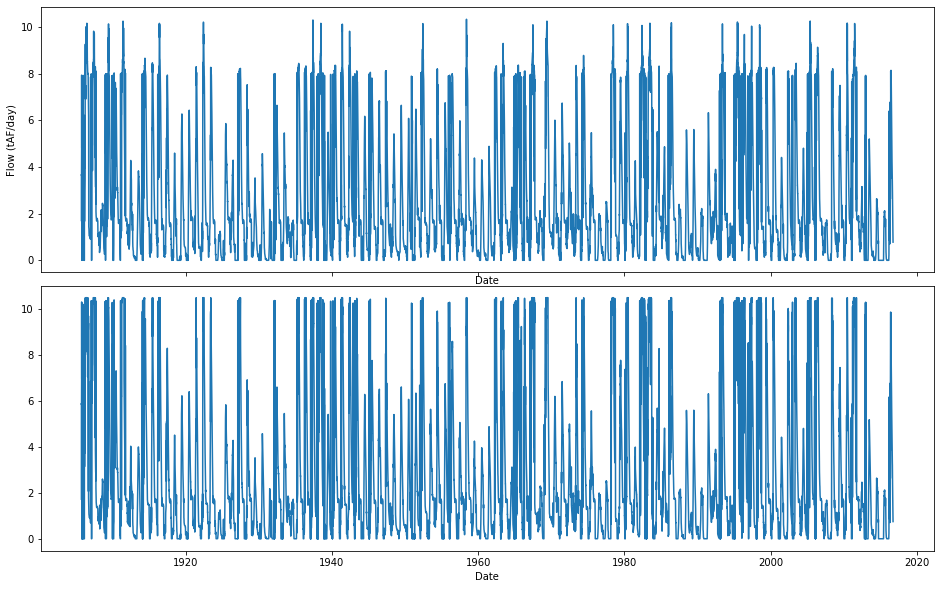

In [23]:
### flow into FKC from millerton
fig, axs = plt.subplots(2,1, figsize=figsize, sharex=True, gridspec_kw={'hspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.plot(flows[s]['fkc_COF_flow'])
    ax.set_xlabel('Date')
a = axs[0].set_ylabel('Flow (tAF/day)')

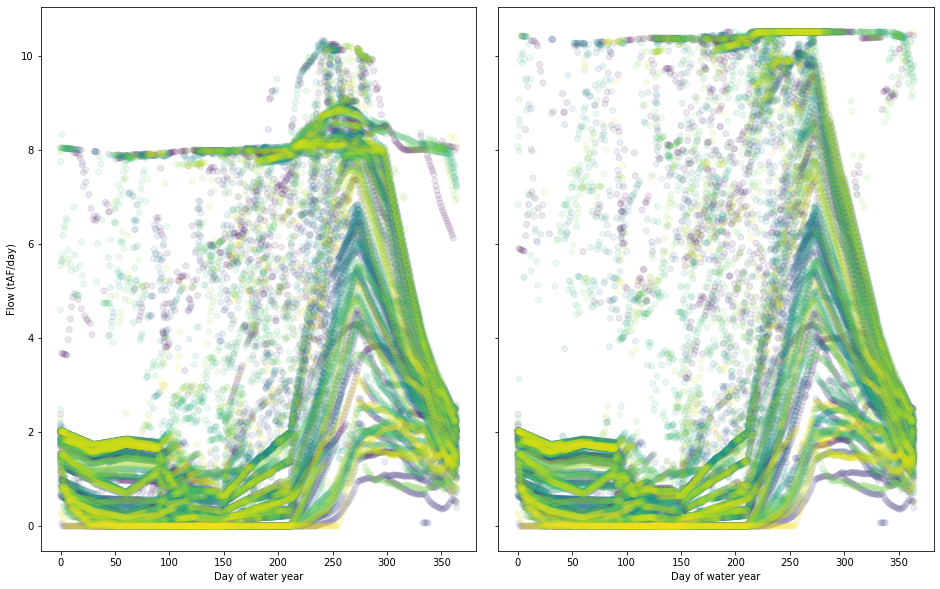

In [24]:
### flow into FKC from millerton
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

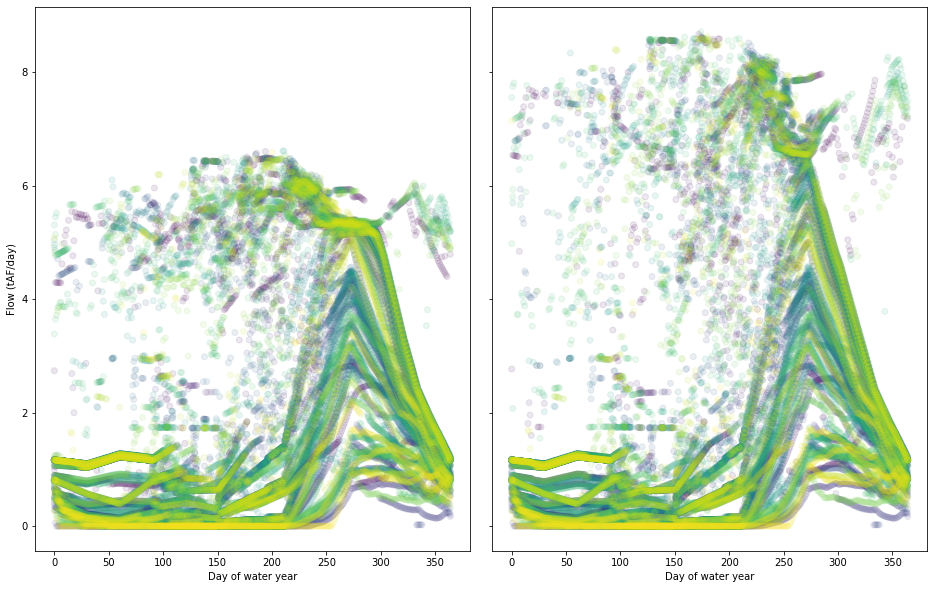

In [25]:
### flow into LWT
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, flows[s]['fkc_LWT_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

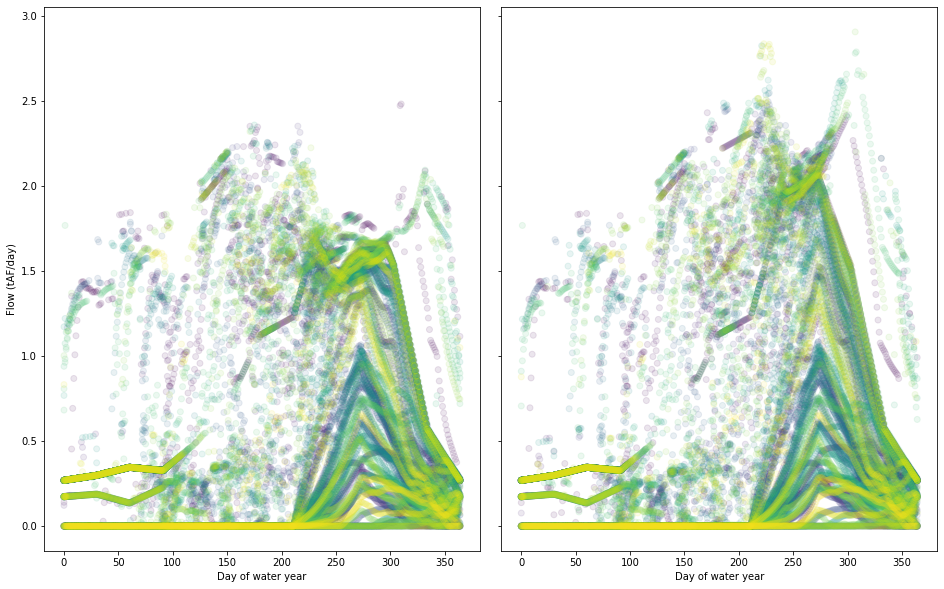

In [26]:
### turnout at LWT
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    ax.scatter(dowy, turnouts[s]['fkc_LWT_turnout'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Day of water year')
a = axs[0].set_ylabel('Flow (tAF/day)')

In [27]:
flowkeys = [k.split('_')[1] for k in flows[s].keys()]
turnoutkeys = [k.split('_')[1] for k in turnouts[s].keys()]
print(flowkeys)
print(turnoutkeys)

['COF', 'FRS', 'KGR', 'OFK', 'TUL', 'KWD', 'OKW', 'KWR', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TLR', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']
['COF', 'FRS', 'OFK', 'TUL', 'KWD', 'OKW', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']


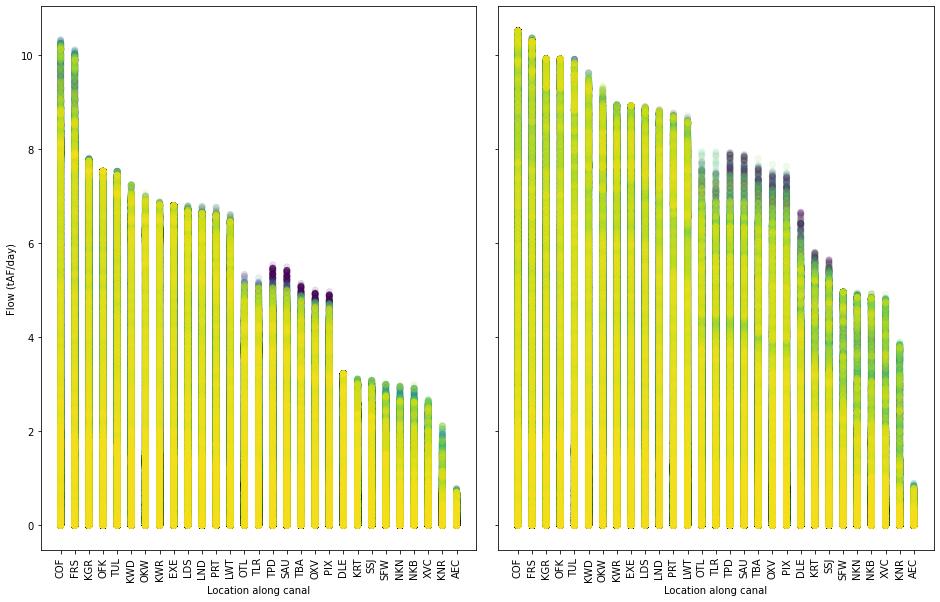

In [28]:
### flow along canal
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j,k in enumerate(flows[s]):
        ax.scatter([j for _ in flows[s][k]], flows[s][k], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(flows[s].shape[1]))
    ax.set_xticklabels(flowkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/day)')

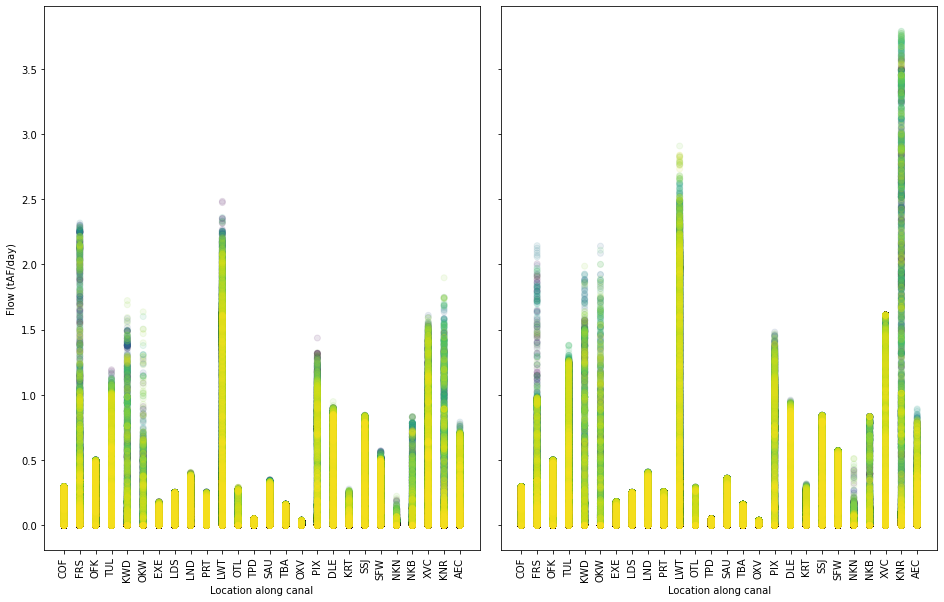

In [29]:
### turnouts along canal
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j,k in enumerate(turnouts[s]):
        ax.scatter([j for _ in turnouts[s][k]], turnouts[s][k], c=wy, alpha=0.1, cmap='viridis')
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(turnouts[s].shape[1]))
    ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/day)')

In [30]:
### annual totals
flowsums = {}
turnoutsums = {}
for s in scenarios:
    flowsums[s] = flows[s].groupby(wy).sum()
    turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [31]:
cmap = cm.get_cmap('RdBu')

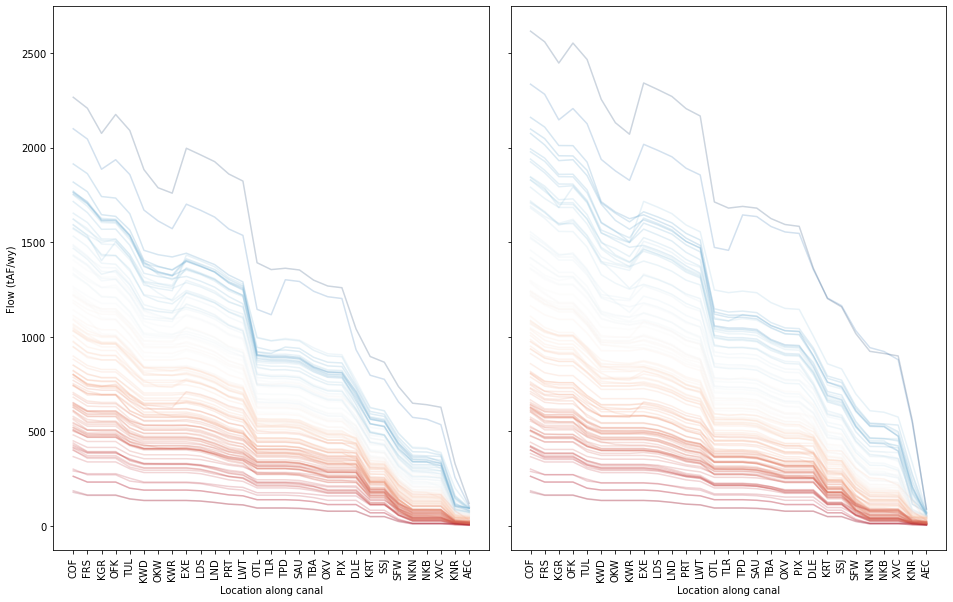

In [32]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(flowsums[s].shape[1]))
    ax.set_xticklabels(flowkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/wy)')

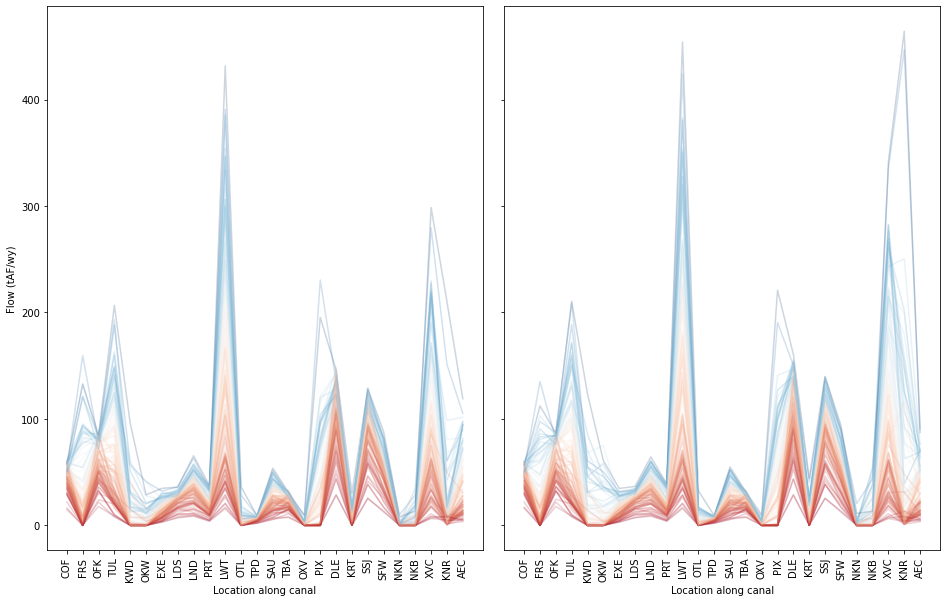

In [33]:
### turnouts along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(1,2, figsize=figsize, sharey=True, gridspec_kw={'wspace':0.05})
for i,s in enumerate(scenarios):
    ax = axs[i]
    for j in range(turnoutsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_xlabel('Location along canal')
    ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
    ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = axs[0].set_ylabel('Flow (tAF/wy)')

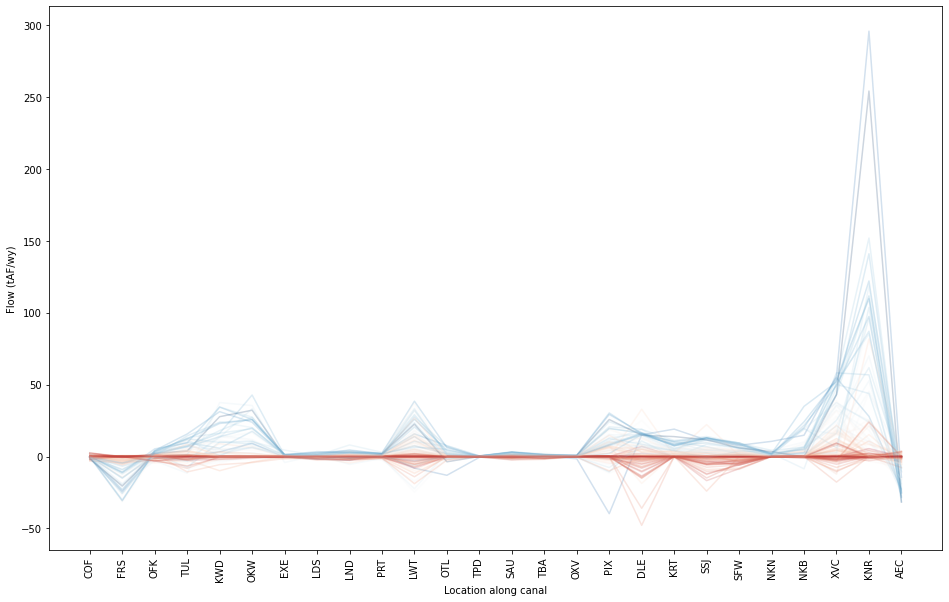

In [34]:
### difference between scenarios, turnouts along canal, annual flow. color based on total annual flow in fkc.
fig, ax = plt.subplots(1,1,figsize=figsize)
for j in range(turnoutsums[s].shape[0]):
    flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
    ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
ax.set_xlabel('Location along canal')
ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
ax.set_xticklabels(turnoutkeys, rotation='vertical')
a = ax.set_ylabel('Flow (tAF/wy)')

In [36]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_LWT','FKC_rehab_ownership_PIX','FKC_rehab_ownership_DLE','FKC_rehab_ownership_SSJ','FKC_rehab_ownership_SOC','FKC_rehab_ownership_LWT_PIX_DLE_SSJ','FKC_rehab_ownership_LWT_PIX_DLE_SSJ_SOC']
# flows = {}
# turnouts = {}
# for s in scenarios:
#     dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
#     keys = list(dat.keys())
#     b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
#     flows[s] = dat.loc[:, b]
#     b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
#     turnouts[s] = dat.loc[:, b]

In [37]:
# ### annual totals
# flowsums = {}
# turnoutsums = {}
# for s in scenarios:
#     flowsums[s] = flows[s].groupby(wy).sum()
#     turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [38]:
# ### flow into FKC from millerton
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
#     ax.set_xlabel('Day of water year')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1
# # a = axs[].set_ylabel('Flow (tAF/day)')

In [40]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(flowsums[s].shape[1]))
#         ax.set_xticklabels(flowkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    
# # a = axs[0].set_ylabel('Flow (tAF/wy)')

In [39]:
# ### not sure why we have negative flow - something wrong
# plt.plot(flows['FKC_rehab_ownership_LWT']['fkc_AEC_flow'])

In [41]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
# #         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    
# # a = axs[0].set_ylabel('Flow (tAF/wy)')

In [42]:
# ### flow along canal, annual flow. color based on wet/dry year.
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j in range(flowsums[s].shape[0]):
#         flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
#         ax.plot(turnoutsums[s].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
# #         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    

In [43]:
# ### annual turnout boxplots
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.boxplot(turnoutsums[s] - turnoutsums[scenarios[0]])
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(turnoutsums[s].shape[1])+1)
#         ax.set_xticklabels(turnoutkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1    

In [44]:
# [s for s in keys if 'irvineranch' in s.split('_')]

In [45]:
# scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_LWT','FKC_rehab_ownership_PIX','FKC_rehab_ownership_DLE','FKC_rehab_ownership_SSJ','FKC_rehab_ownership_SOC','FKC_rehab_ownership_LWT_PIX_DLE_SSJ','FKC_rehab_ownership_LWT_PIX_DLE_SSJ_SOC']
# bankkeys = ['semitropic_MET', 'semitropic_SOB', 'rosedale_RRB','rosedale_ARV','rosedale_DLE','rosedale_CTL','rosedale_CCH',
#              'rosedale_BVA', 'rosedale_SOC', 'rosedale_KRT', 'kwb_DLR', 'kwb_KCWA', 'kwb_ID4', 'kwb_SMI', 'kwb_TJC', 'kwb_WON',
#             'kwb_WRM','pioneer_BLR', 'pioneer_BDM', 'pioneer_BVA', 'pioneer_HML', 'pioneer_ID4', 'pioneer_KCWA', 'pioneer_KND',
#             'pioneer_LHL', 'pioneer_RRB', 'pioneer_SMI', 'pioneer_TJC', 'pioneer_WRM', 'arvin_ARV', 'arvin_MET', 'arvin_OXV',
#             'arvin_LWT', 'arvin_KRT', 'arvin_PIX', 'northkernwb_NKN', 'northkernwb_CWO', 'northkernwb_DLE',
#            'berrendawb_BLR', 'berrendawb_BDM', 'berrendawb_LHL', 'berrendawb_WRM', 'b2800_COB', 'b2800_BLR', 'b2800_BDM',
#              'b2800_BVA', 'b2800_CWO', 'b2800_HML', 'b2800_ID4', 'b2800_KCWA', 'b2800_KND', 'b2800_LHL', 'b2800_RRB',
#              'b2800_TJC', 'b2800_WRM', 'wkwb_WKN']
# banking = {}
# for s in scenarios:
#     dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
#     banking[s] = dat.loc[:, bankkeys]

In [46]:
# ### banking across scenarios
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.set_title(s)
#     for k in bankkeys:
#         ax.plot(banking[s][k])
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1

In [47]:
# ### banking relative to baseline_wy2017
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     ax.set_title(s)
#     for k in bankkeys:
#         ax.plot(banking[s][k] - banking[scenarios[0]][k], label=k)
# #     ax.legend()
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1

In [48]:
# ### change in banked water over 111 yrs
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j,k in enumerate(banking[s].columns):
#         ax.scatter([j], [banking[s][k].iloc[-1] - banking[s][k].iloc[0]], c='k')
#     ax.axhline(0, c='grey', ls=':')
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(banking[s].shape[1]))
#         ax.set_xticklabels(bankkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1  
#         ax.set_ylabel('Banked (tAF)')

In [49]:
# ### change in banked water over 111 yrs, relative to baseline_wy2017
# fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
# row = 0
# col = 0
# for i,s in enumerate(scenarios[1:]):
#     ax = axs[row,col]
#     for j,k in enumerate(banking[s].columns):
#         ax.scatter([j], [(banking[s][k].iloc[-1] - banking[s][k].iloc[0]) - (banking[scenarios[0]][k].iloc[-1] - banking[scenarios[0]][k].iloc[0])], c='k')
#     ax.axhline(0, c='grey', ls=':')
#     ax.set_title(s)
#     if row == 3:
#         ax.set_xlabel('Location along canal')
#         ax.set_xticks(np.arange(banking[s].shape[1]))
#         ax.set_xticklabels(bankkeys, rotation='vertical')
#     if col == 1:
#         row += 1
#         col = 0
#     else:
#         col += 1  
#         ax.set_ylabel('Banked (tAF)')

In [50]:
# banking[s].columns

## more FKC ownership scenarios, with no all-access round

In [8]:
scenarios = ['baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none', 'baseline_wy2017','FKC_capacity_rehab_full','FKC_rehab_ownership_grp1','FKC_rehab_ownership_none','FKC_rehab_ownership_none']#,'FKC_rehab_ownership_grp3','FKC_rehab_ownership_grp12','FKC_rehab_ownership_grp13','FKC_rehab_ownership_bankees','FKC_rehab_ownership_none']
flows = {}
turnouts = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    keys = list(dat.keys())
    b = [k for k in keys if ('fkc' in k.split('_')) and ('flow' in k.split('_'))]
    flows[s] = dat.loc[:, b]
    b = [k for k in keys if ('fkc' in k.split('_')) and ('turnout' in k.split('_'))]
    turnouts[s] = dat.loc[:, b]

In [9]:
### annual totals
flowsums = {}
turnoutsums = {}
for s in scenarios:
    flowsums[s] = flows[s].groupby(wy).sum()
    turnoutsums[s] = turnouts[s].groupby(wy).sum()                

In [14]:
flowkeys = [k.split('_')[1] for k in flows[s].keys()]
turnoutkeys = [k.split('_')[1] for k in turnouts[s].keys()]
print(flowkeys)
print(turnoutkeys)

['COF', 'FRS', 'KGR', 'OFK', 'TUL', 'KWD', 'OKW', 'KWR', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TLR', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']
['COF', 'FRS', 'OFK', 'TUL', 'KWD', 'OKW', 'EXE', 'LDS', 'LND', 'PRT', 'LWT', 'OTL', 'TPD', 'SAU', 'TBA', 'OXV', 'PIX', 'DLE', 'KRT', 'SSJ', 'SFW', 'NKN', 'NKB', 'XVC', 'KNR', 'AEC']


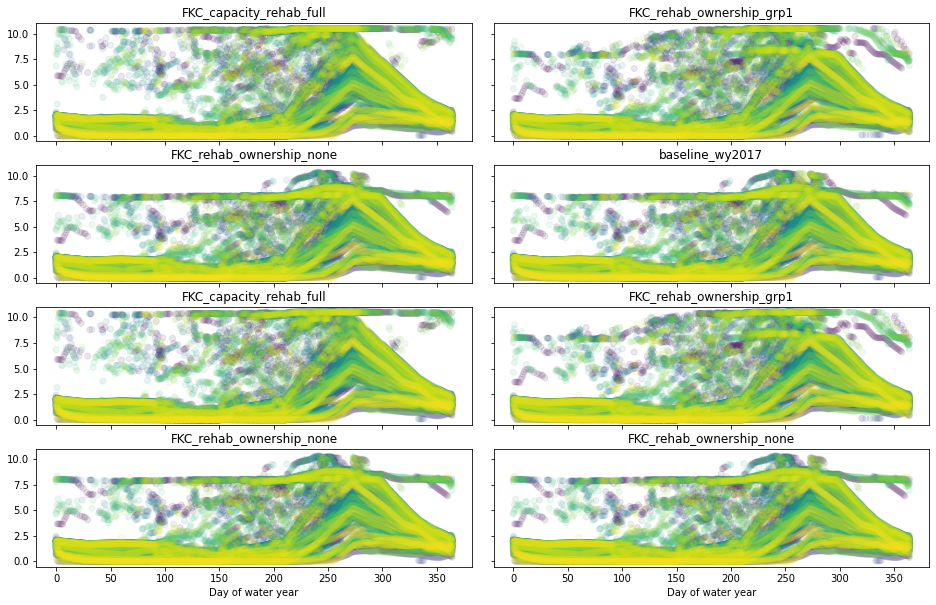

In [10]:
### flow into FKC from millerton
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    ax.scatter(dowy, flows[s]['fkc_COF_flow'], c=wy, alpha=0.1, cmap='viridis')
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Day of water year')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1
# a = axs[].set_ylabel('Flow (tAF/day)')

In [12]:
cmap = cm.get_cmap('RdBu')

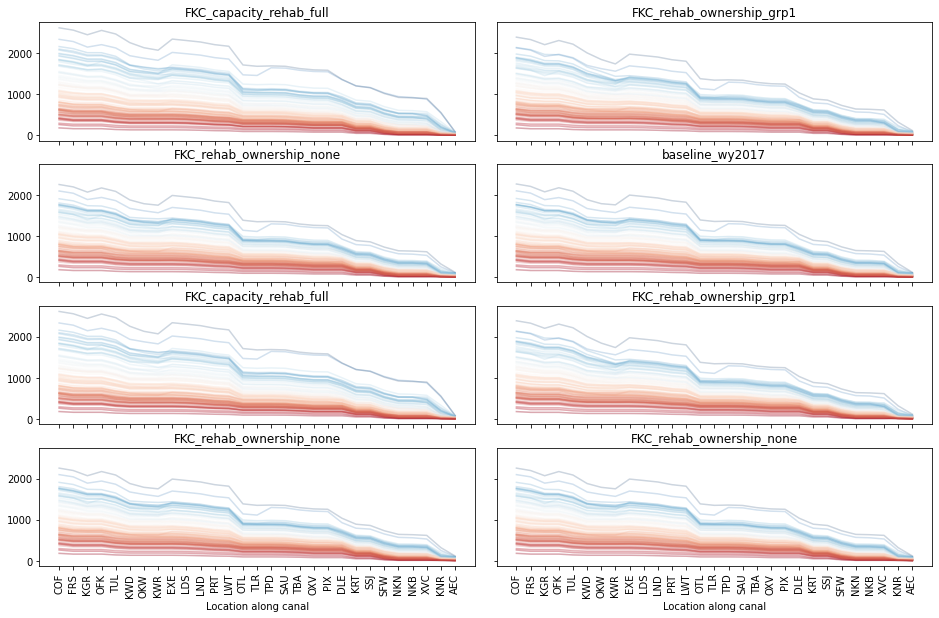

In [15]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(flowsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(flowsums[s].shape[1]))
        ax.set_xticklabels(flowkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    
# a = axs[0].set_ylabel('Flow (tAF/wy)')

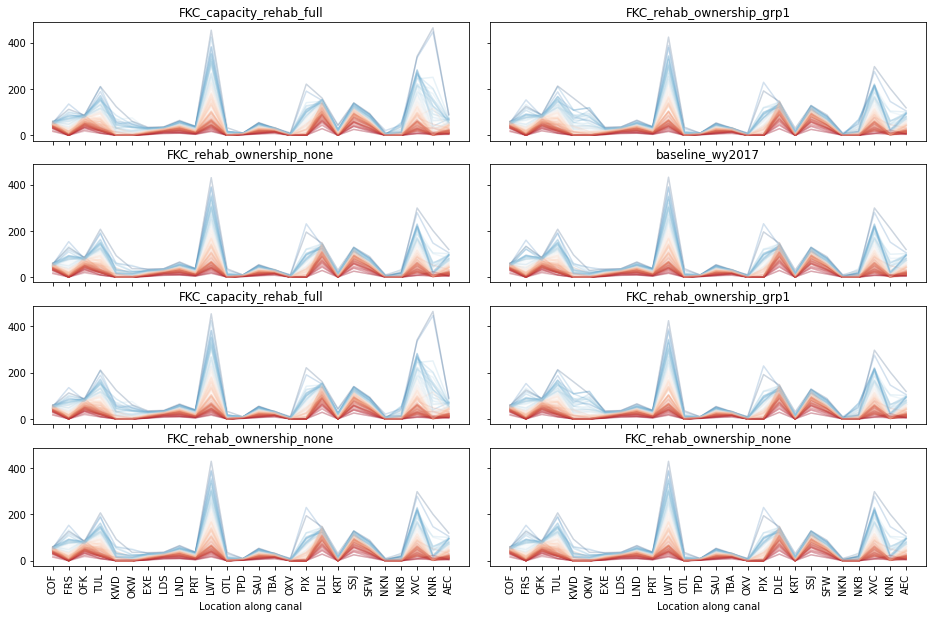

In [16]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    
# a = axs[0].set_ylabel('Flow (tAF/wy)')

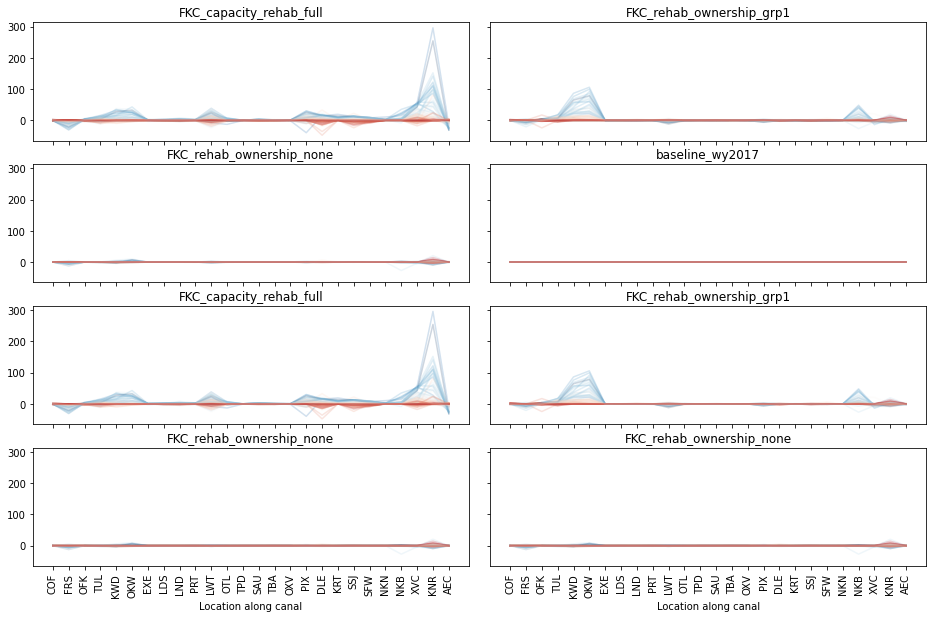

In [17]:
### flow along canal, annual flow. color based on wet/dry year.
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    for j in range(flowsums[s].shape[0]):
        flowfrac = flowsums[scenarios[1]]['fkc_COF_flow'].iloc[j] / flowsums[scenarios[1]]['fkc_COF_flow'].max()
        ax.plot(turnoutsums[s].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
#         ax.plot(turnoutsums[scenarios[1]].iloc[j,:] - turnoutsums[scenarios[0]].iloc[j,:], alpha=0.2, c=cmap(flowfrac))
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1]))
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

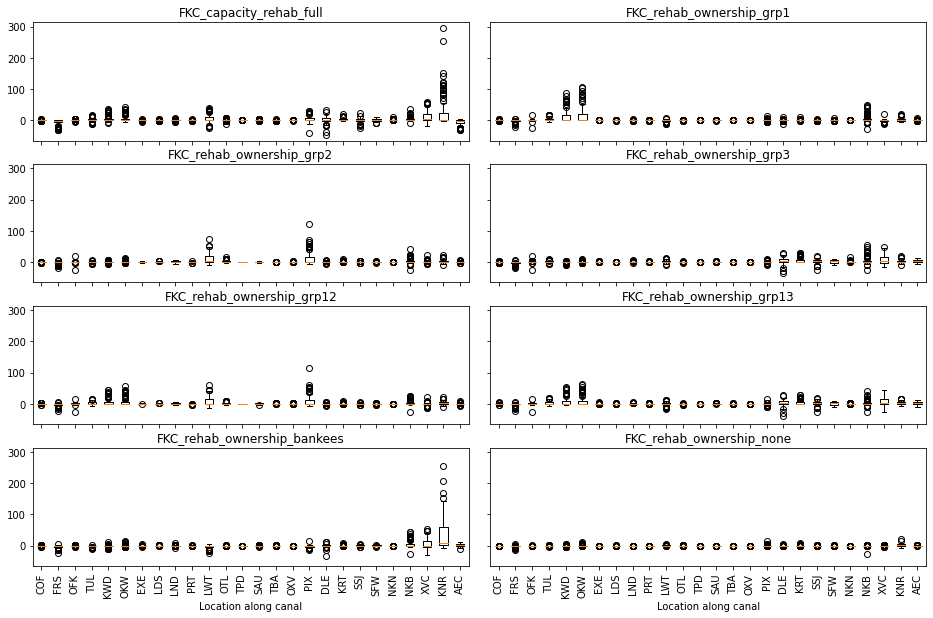

In [98]:
### annual turnout boxplots
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    ax.boxplot(turnoutsums[s] - turnoutsums[scenarios[0]])
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1])+1)
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1    

In [99]:
bankkeys = ['semitropic_MET', 'semitropic_SOB', 'rosedale_RRB','rosedale_ARV','rosedale_DLE',
             'rosedale_BVA', 'rosedale_SOC', 'rosedale_KRT', 'kwb_DLR', 'kwb_KCWA', 'kwb_ID4', 'kwb_SMI', 'kwb_TJC', 'kwb_WON',
            'kwb_WRM','pioneer_BLR', 'pioneer_BDM', 'pioneer_BVA', 'pioneer_HML', 'pioneer_ID4', 'pioneer_KCWA', 'pioneer_KND',
            'pioneer_LHL', 'pioneer_RRB', 'pioneer_SMI', 'pioneer_TJC', 'pioneer_WRM', 'arvin_ARV', 'arvin_OXV',
            'arvin_LWT', 'arvin_KRT', 'arvin_PIX', 'northkernwb_NKN', 'northkernwb_CWO', 'northkernwb_DLE',
           'berrendawb_BLR', 'berrendawb_BDM', 'berrendawb_LHL', 'berrendawb_WRM', 'b2800_COB', 'b2800_BLR', 'b2800_BDM',
             'b2800_BVA', 'b2800_CWO', 'b2800_HML', 'b2800_ID4', 'b2800_KCWA', 'b2800_KND', 'b2800_LHL', 'b2800_RRB',
             'b2800_TJC', 'b2800_WRM', 'wkwb_WKN']
banking = {}
for s in scenarios:
    dat = get_results_sensitivity_number_outside_model('results/' + s + '/results.hdf5', '')
    banking[s] = dat.loc[:, bankkeys]

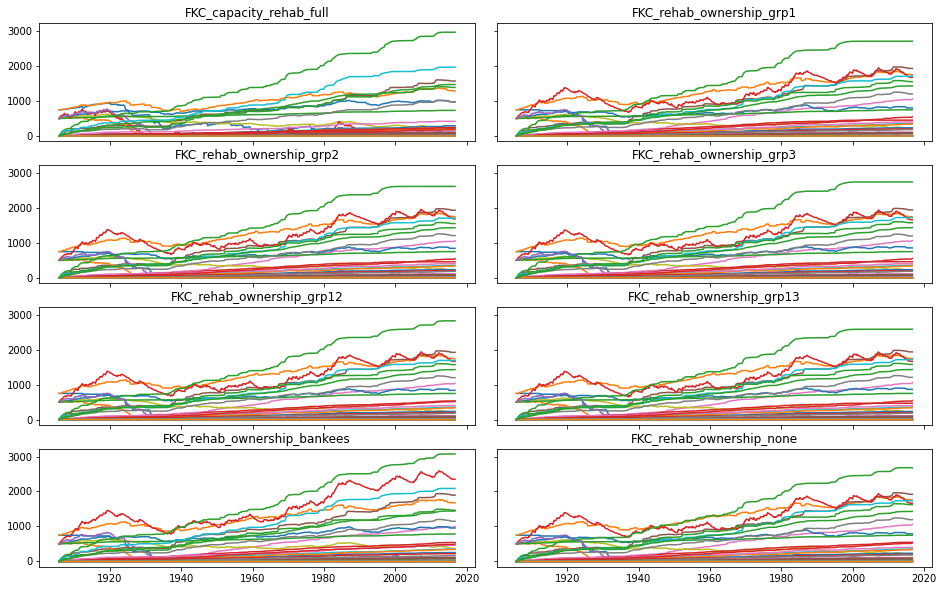

In [100]:
### banking across scenarios
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    ax.set_title(s)
    for k in bankkeys:
        ax.plot(banking[s][k])
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

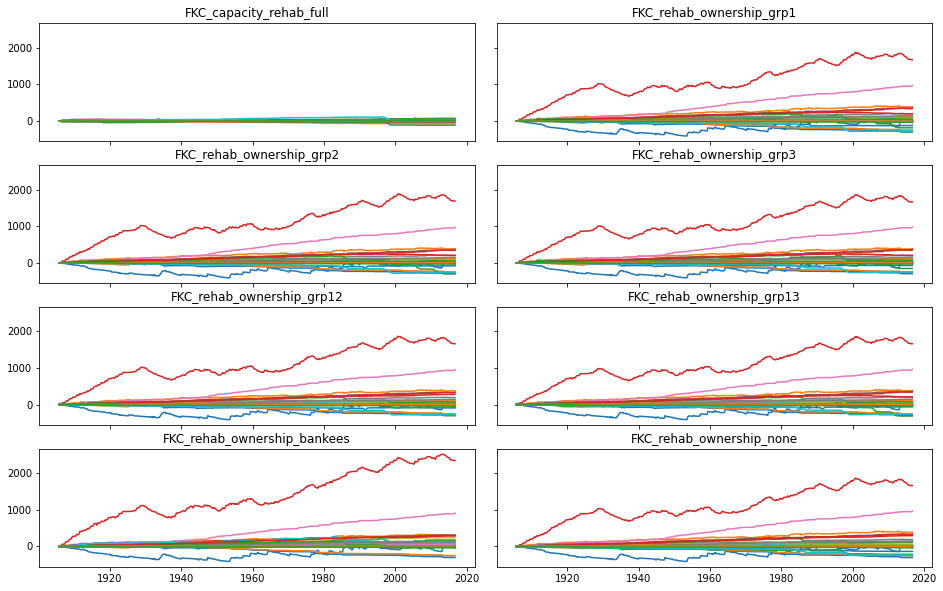

In [101]:
### banking relative to baseline_wy2017
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    ax.set_title(s)
    for k in bankkeys:
        ax.plot(banking[s][k] - banking[scenarios[0]][k], label=k)
#     ax.legend()
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1

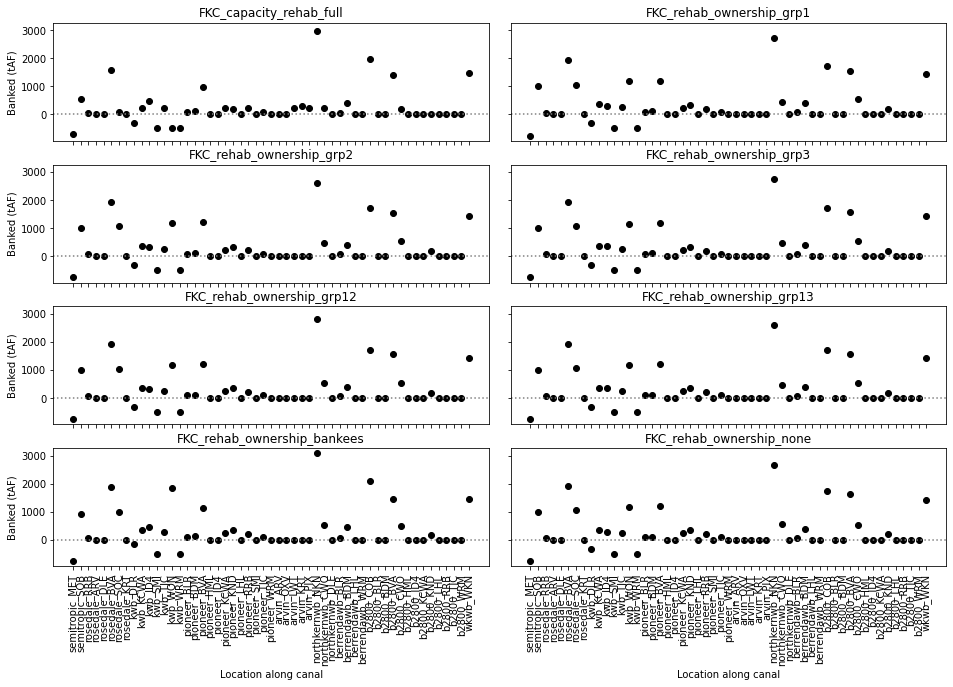

In [102]:
### change in banked water over 111 yrs
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    for j,k in enumerate(banking[s].columns):
        ax.scatter([j], [banking[s][k].iloc[-1] - banking[s][k].iloc[0]], c='k')
    ax.axhline(0, c='grey', ls=':')
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(banking[s].shape[1]))
        ax.set_xticklabels(bankkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1  
        ax.set_ylabel('Banked (tAF)')

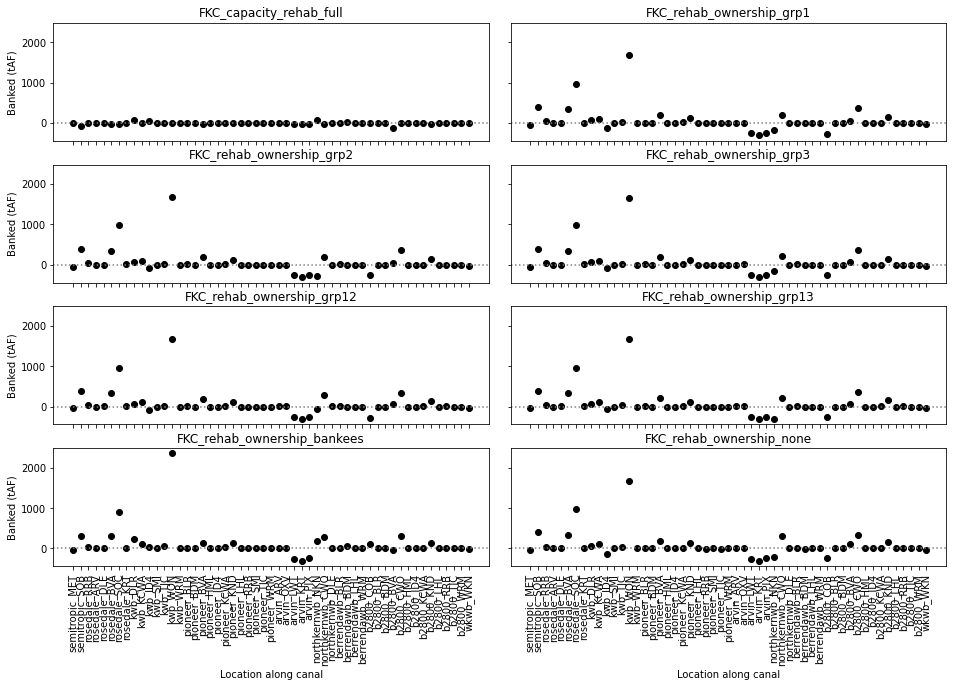

In [103]:
### change in banked water over 111 yrs, relative to baseline_wy2017
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    for j,k in enumerate(banking[s].columns):
        ax.scatter([j], [(banking[s][k].iloc[-1] - banking[s][k].iloc[0]) - (banking[scenarios[0]][k].iloc[-1] - banking[scenarios[0]][k].iloc[0])], c='k')
    ax.axhline(0, c='grey', ls=':')
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(banking[s].shape[1]))
        ax.set_xticklabels(bankkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1  
        ax.set_ylabel('Banked (tAF)')

In [ ]:
bars = []
stds = []
for s in scenarios[1:]:
    bars.append((turnoutsums[s] - turnoutsums[scenarios[0]]).sum(axis=1).mean())
    stds.append((turnoutsums[s] - turnoutsums[scenarios[0]]).sum(axis=1).std())

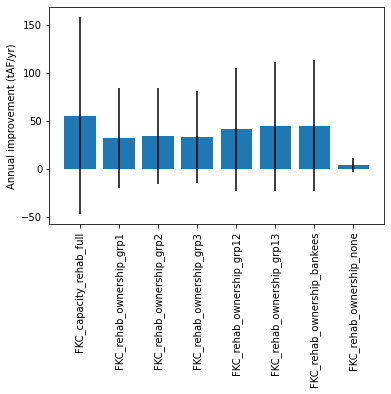

In [141]:
f = plt.bar(np.arange(len(bars)), bars, yerr=stds)
_ = plt.xticks(np.arange(len(bars)), scenarios[1:], rotation=90)
_ = plt.ylabel('Annual improvement (tAF/yr)')

ValueError: shape mismatch: objects cannot be broadcast to a single shape

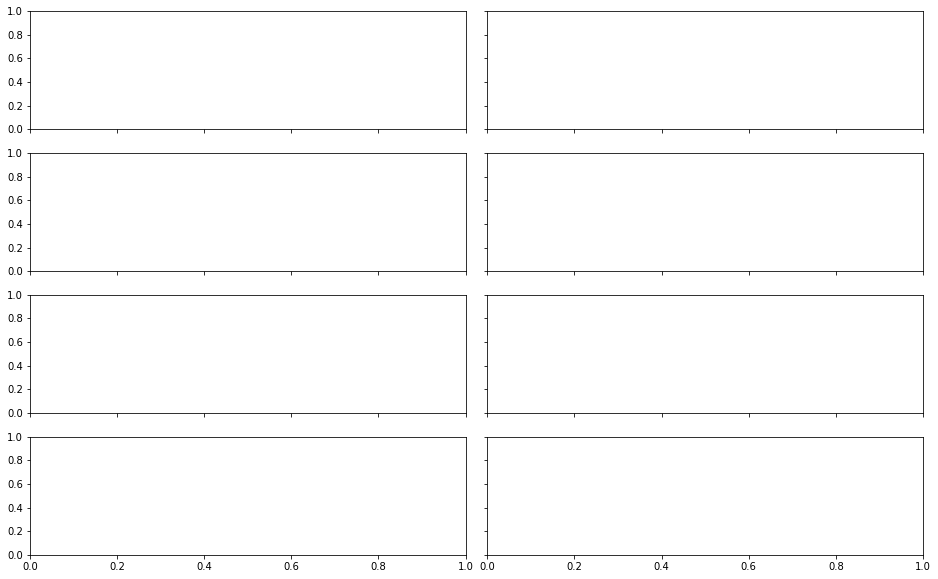

In [154]:
### annual turnout boxplots
fig, axs = plt.subplots(4,2, figsize=figsize, sharey=True, sharex=True, gridspec_kw={'wspace':0.05})
row = 0
col = 0
for i,s in enumerate(scenarios[1:]):
    ax = axs[row,col]
    ax.bar(np.arange(turnoutsums[s].shape[0]), turnoutsums[s].mean().values, yerr=turnoutsums[s].std().values)
    ax.set_title(s)
    if row == 3:
        ax.set_xlabel('Location along canal')
        ax.set_xticks(np.arange(turnoutsums[s].shape[1])+1)
        ax.set_xticklabels(turnoutkeys, rotation='vertical')
    if col == 1:
        row += 1
        col = 0
    else:
        col += 1  

In [153]:
turnoutsums[s].std().values

array([  9.47502529,  30.49218246,  17.87126571,  51.27089163,
        22.08261082,  16.27446493,   7.90303506,   6.3464535 ,
        13.57384491,   8.90982908, 110.09883202,   5.94565739,
         1.68952961,  12.72829899,   5.94746942,   1.74192116,
        45.85913643,  31.90296991,   9.26172341,  27.68260479,
        18.82843016,   2.65460876,  12.62027723,  83.39318755,
        77.39655846,  22.38085579])